In [70]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

In [71]:
data <- read_csv('../results/benchmark.csv')
# data <- data %>% filter(cells %in% c(100,200,400,800,1600,3200,6400,12800,25600,51200,102400))
data <- data %>% filter(cells > 0 ) %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA'))
data <- data[data$global_score > 0,]
data$cells <- as.numeric(data$cells)
data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
head(data,4)

Rows: 1512 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,1600,0,Harmony,0.811875,-43.54000,0.40098505,0.264375,0.30375,2.580500
MERFISH,1600,0,PASTE,0.312500,-26.42375,0.02937850,0.235000,0.72125,12.055964
MERFISH,1600,0,SLAT,0.711250,-35.63250,0.06179487,0.475625,0.65250,4.967935
MERFISH,1600,0,STAGATE,0.256875,-50.07500,0.39578277,0.088750,0.27000,17.168893


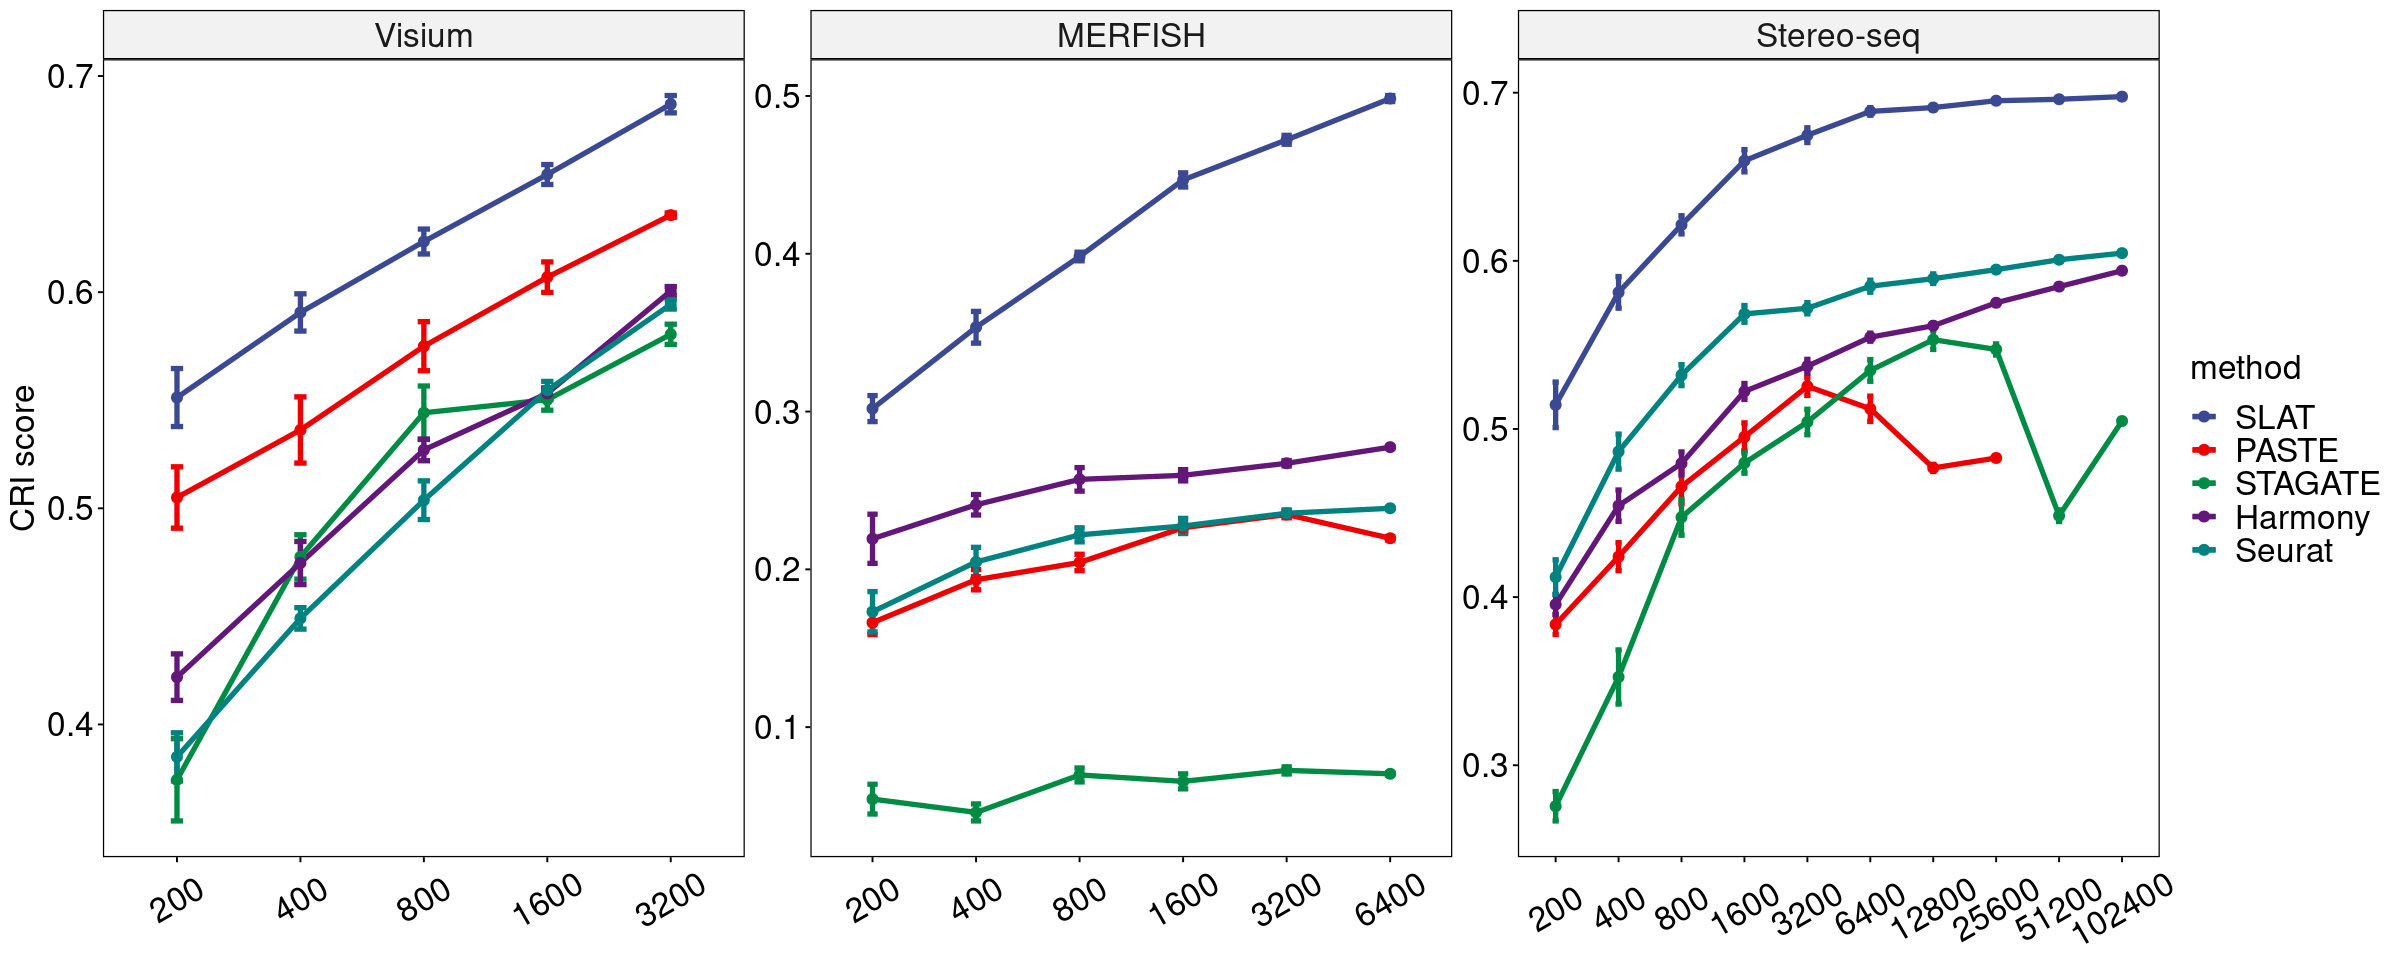

In [72]:
options(repr.plot.width=20, repr.plot.height=8)
ggline(data, x="cells", y="global_score", palette='aaas', color="method",
     add="mean_se", facet.by='dataset', xlab =F, ylab='CRI score',size=1.5, lab.size=10) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) + facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))

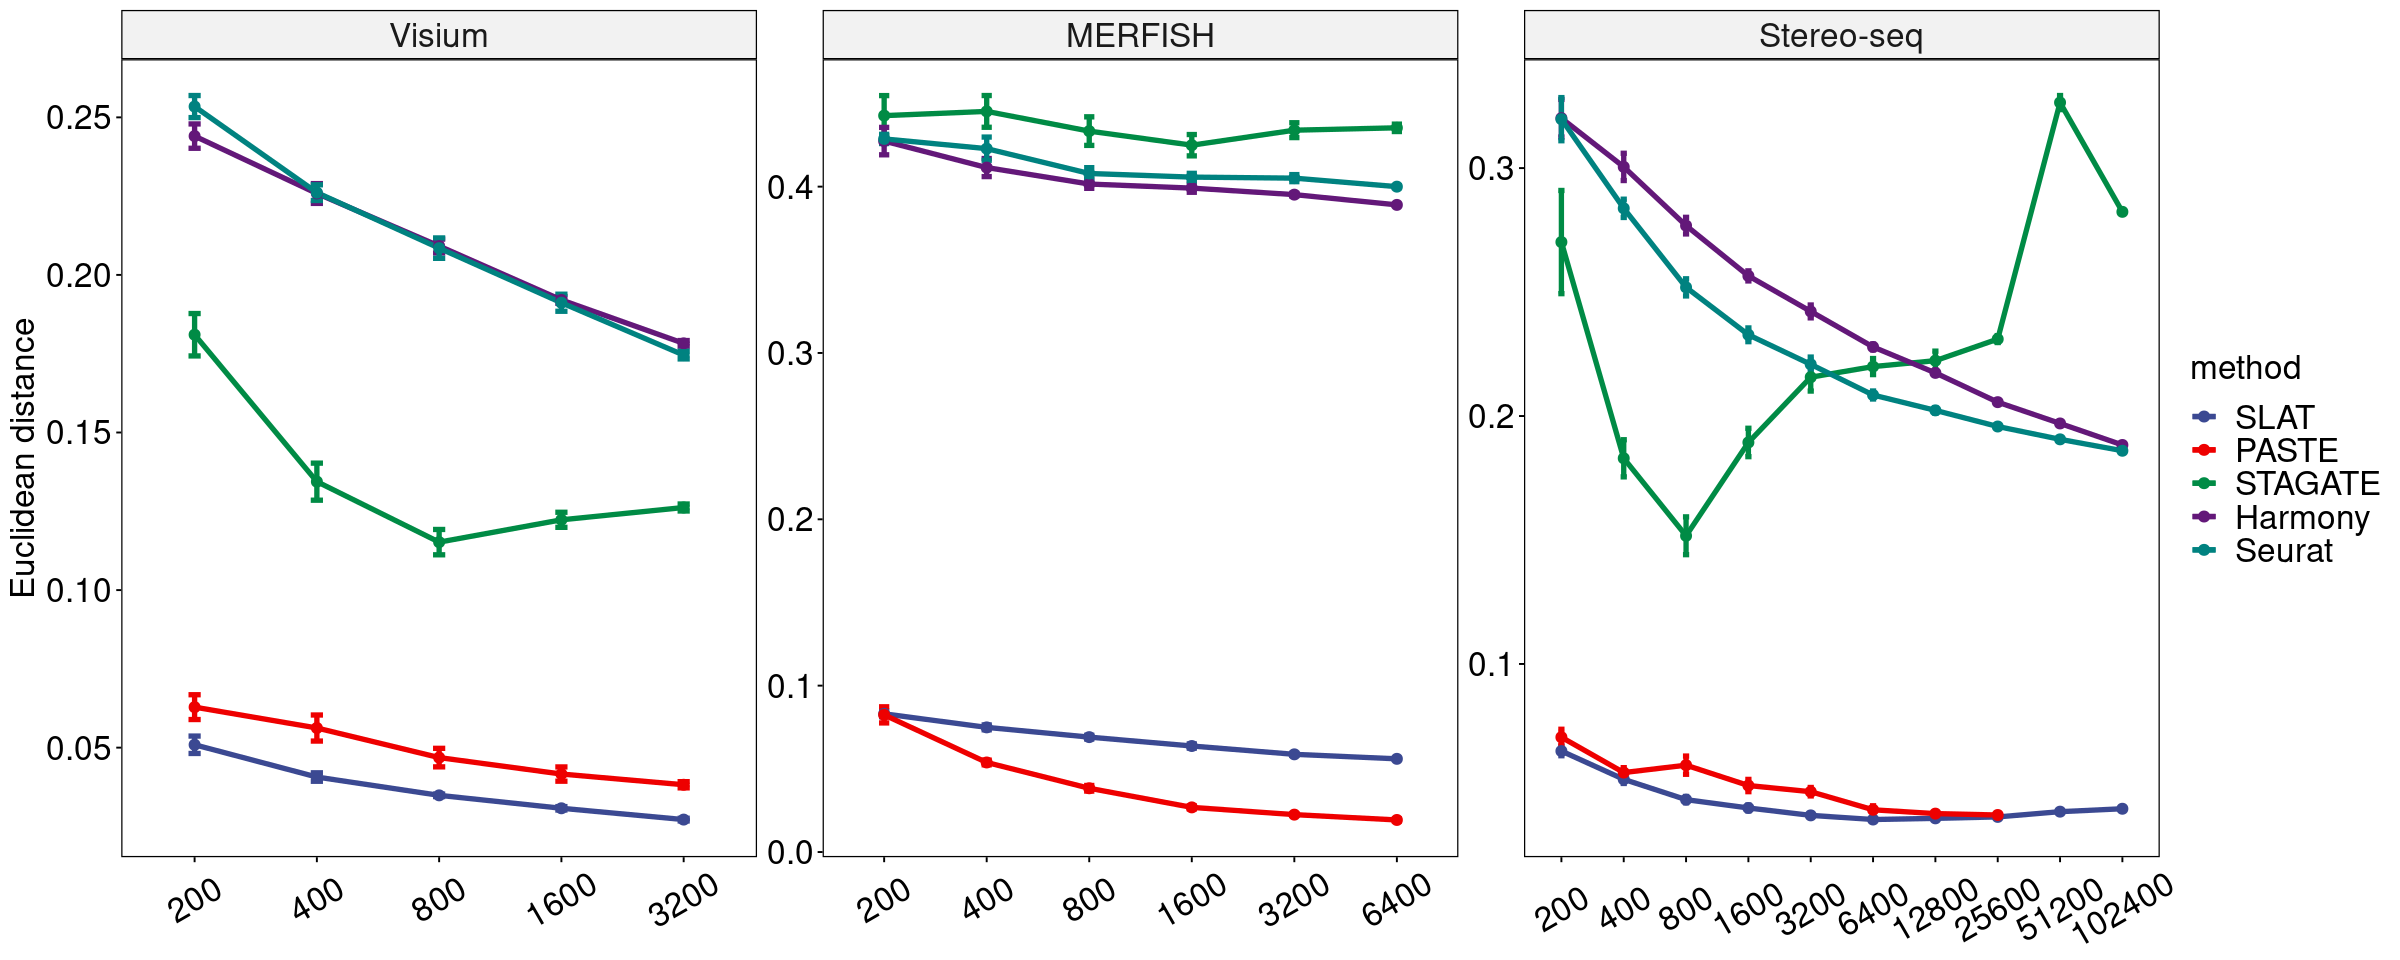

In [73]:
options(repr.plot.width=20, repr.plot.height=8)
ggline(data, x="cells", y="euclidean_dis", palette='aaas', color="method",
     add="mean_se", facet.by='dataset', xlab =F, ylab='Euclidean distance',size=1.5, lab.size=10) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) + facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))

# Time analysis

In [74]:
data <- read_csv('../results/benchmark.csv')
data$cells <- as.numeric(data$cells)
# data <- data[data$cells %in% c(4000, 5000, 6000, 8000, 10000, 15000, 20000, 30000, 50000, 100000),]
data <- data %>% filter(cells >=3200 ) %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA'))
data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
head(data,4)

Rows: 1512 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
merfish_mouse_hypothalamic,3200,0,Harmony,0.8178125,-44.14125,0.39260169,0.2731250,0.3259375,9.880529
merfish_mouse_hypothalamic,3200,0,PASTE,0.3112500,-27.19937,0.02338306,0.2434375,0.7490625,16.783437
merfish_mouse_hypothalamic,3200,0,SLAT,0.7143750,-38.34625,0.05716435,0.4778125,0.6643750,5.412937
merfish_mouse_hypothalamic,3200,0,STAGATE,0.2803125,-57.77500,0.42241852,0.0840625,0.2375000,20.899006


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


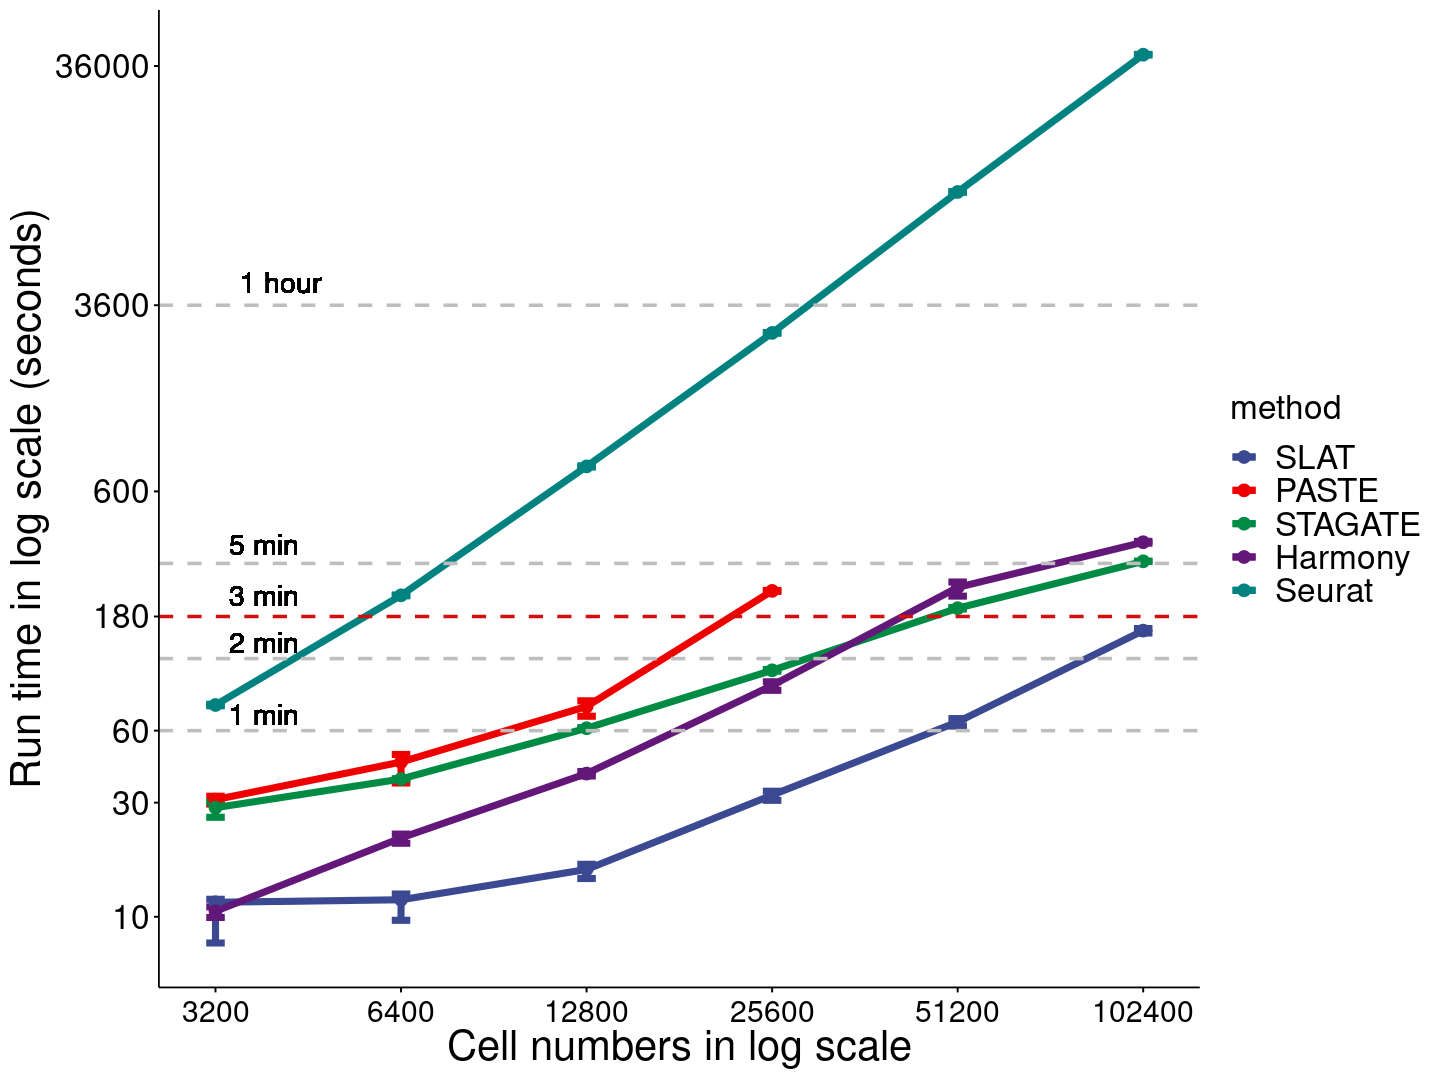

In [81]:
options(repr.plot.width=12, repr.plot.height=9)
ggline(data[data$dataset=='stereo_mouse_embryo' & data$method!='PCA',], x="cells", y="run_time", palette='aaas', color="method",
        add="mean_se", xlab ='Cell numbers in log scale', ylab='Run time in log scale (seconds)', size=2, lab.size=10, numeric.x.axis=T) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=25, font.x=25)  + 
 scale_y_continuous(trans='log2') +  scale_x_continuous(trans='log2') +
 theme(axis.text.x=element_text(angle=0, vjust=0.5, hjust=0.5)) +
 geom_hline(yintercept=3600, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 4500, label='1 hour', hjust=-1), size=6) +
 geom_hline(yintercept=120, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 140, label='2 min', hjust=-1), size=6) +
 geom_hline(yintercept=180, linetype="dashed", color="#d30e0e", size=1) + geom_text(aes(0, 220, label='3 min', hjust=-1), size=6) +
 geom_hline(yintercept=300, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 360, label='5 min', hjust=-1), size=6) +
 geom_hline(yintercept=60, linetype="dashed", color="grey", size=1)+ geom_text(aes(0, 70, label='1 min', hjust=-1), size=6) +
 scale_y_continuous(breaks=c(10,30,60,180,600,3600,36000), trans='log2') +
 scale_x_continuous(breaks=c(200,400,800,1600,3200,6400,12800,25600,51200,102400), trans='log2')

In [76]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='SLAT',])$coef

(Intercept) log2(cells) 
 -6.3789447   0.7922465

In [77]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='PASTE',])$coef

(Intercept) log2(cells) 
 -6.6233742   0.9549308

In [78]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='Seurat',])$coef

(Intercept) log2(cells) 
 -16.195594    1.886453

In [79]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='Harmony',])$coef

(Intercept) log2(cells) 
 -10.236003    1.139425

In [80]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='STAGATE',])$coef

(Intercept) log2(cells) 
 -3.8620957   0.7255612